In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.utils.validation import check_array
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
california_housing = fetch_california_housing(as_frame=True)

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

As noted in the description, the dataset contains aggregate data about each district in California. Let's take a close look at the features that can be used to build a predictive model.

In [4]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In this dataset, we have information about demographics (income, population, housing occupancy), location (latitude, longitude), and general housing information (number of rooms, number of bedrooms, age of housing). Since these statistics are at the neighborhood granularity, they correspond to averages or medians.
If we now look at the target values to be predicted.

In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

We can now further check the data types and whether the dataset contains any missing values.

In [6]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that the dataset has :
- 20640 data and 8 explanatory variables (features);
- all the variables are numerical in floating numbers;
- there are no missing values.

Let's take a quick look at the distribution of these features by plotting their histograms.

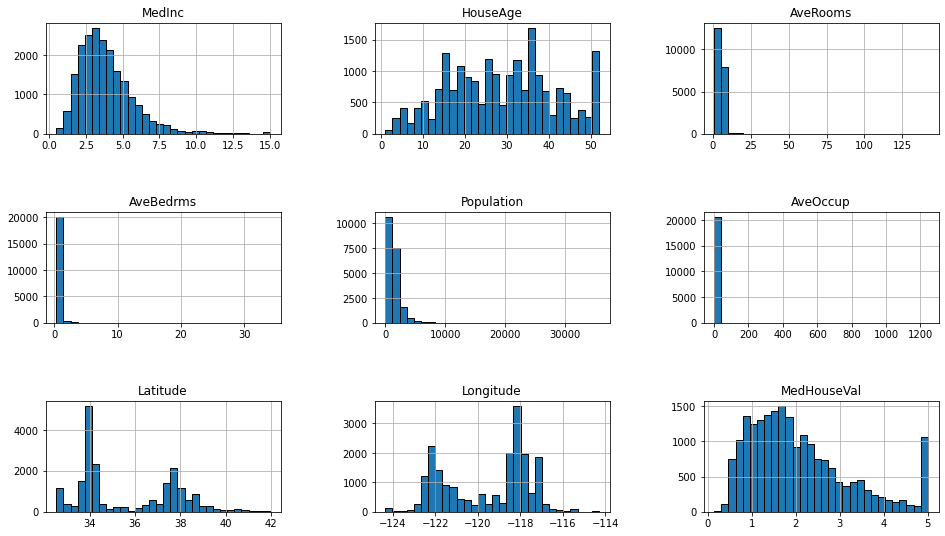

In [7]:
california_housing.frame.hist(figsize=(16, 9), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We can first focus on characteristics with more or less predictable distributions.

Median income is a distribution with a long tail. This means that people's wages are more or less normally distributed but there are a few people with high wages.

In terms of the average age of houses, the distribution is more or less even.

The target distribution also has a long tail. In addition, we have a threshold effect for high value houses: all houses with a price above 5 receive the value 5.

If we focus on average rooms, average bedrooms, average occupancy, and population, the range of data is wide and the highest values are not detectable. This means that there are very high values and few (which could be considered outliers?). We can see this specificity by looking at the statistics for these characteristics:

In [8]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these characteristics, by comparing the max and 75% values, we can see a huge difference. This confirms the intuitions that there are some extreme values.

So far we have discarded longitude and latitude which carry geographical information. In short, the combination of these characteristics could help us decide if there are locations associated with high value homes. Indeed, we could make a scatter plot where the x and y axes are latitude and longitude and the size and color of the circle is related to the value of the houses in the district.

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

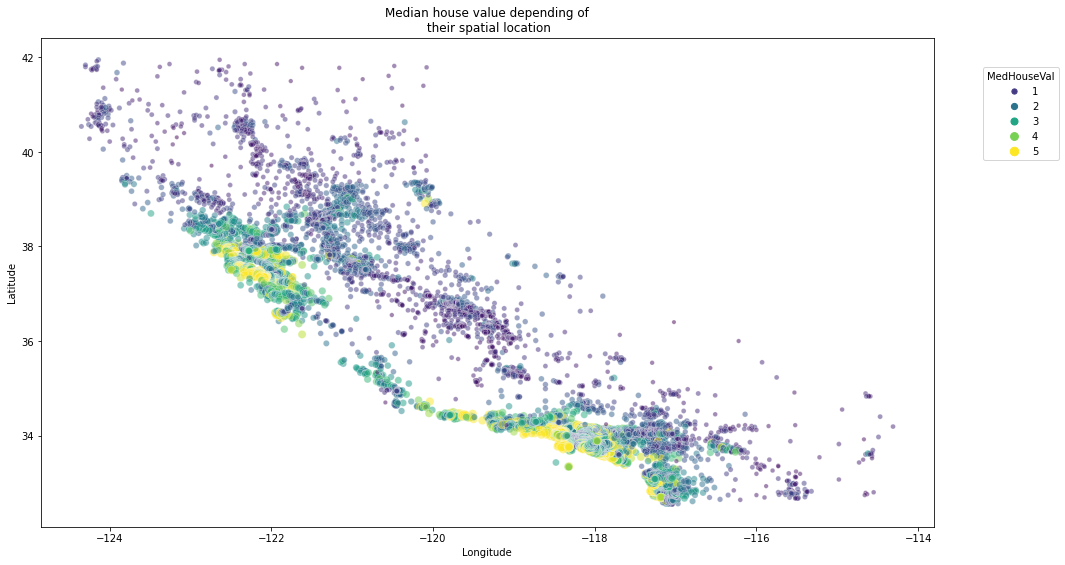

In [9]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Median house value depending of\n their spatial location")

If you are not familiar with the state of California, it is interesting to note that all of the data points show a graphical representation of the state. We see that the most expensive homes will be located on the coast, where the major cities of California are located - San Diego, Los Angeles, San Jose, or San Francisco.

We can do a random subsampling to have fewer data points to plot, but it could still allow us to see these specifics.

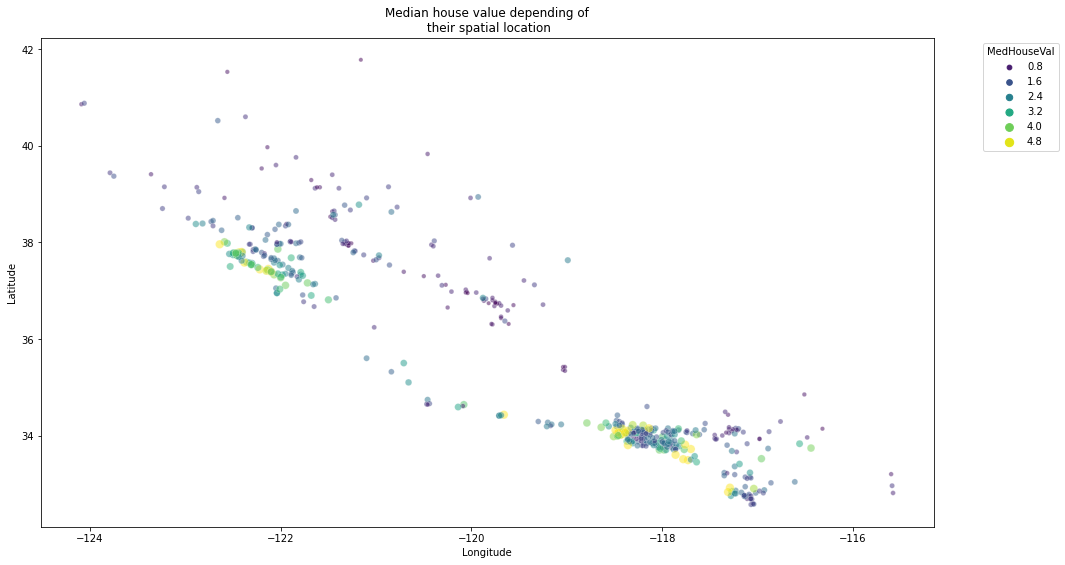

In [10]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,replace=False)

plt.figure(figsize=(16,9))
sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We can do a final analysis by doing a pairwise plot of all the features and the target, but without the longitude and latitude. We will quantify the target so that we can create an appropriate histogram.

<Figure size 1152x648 with 0 Axes>

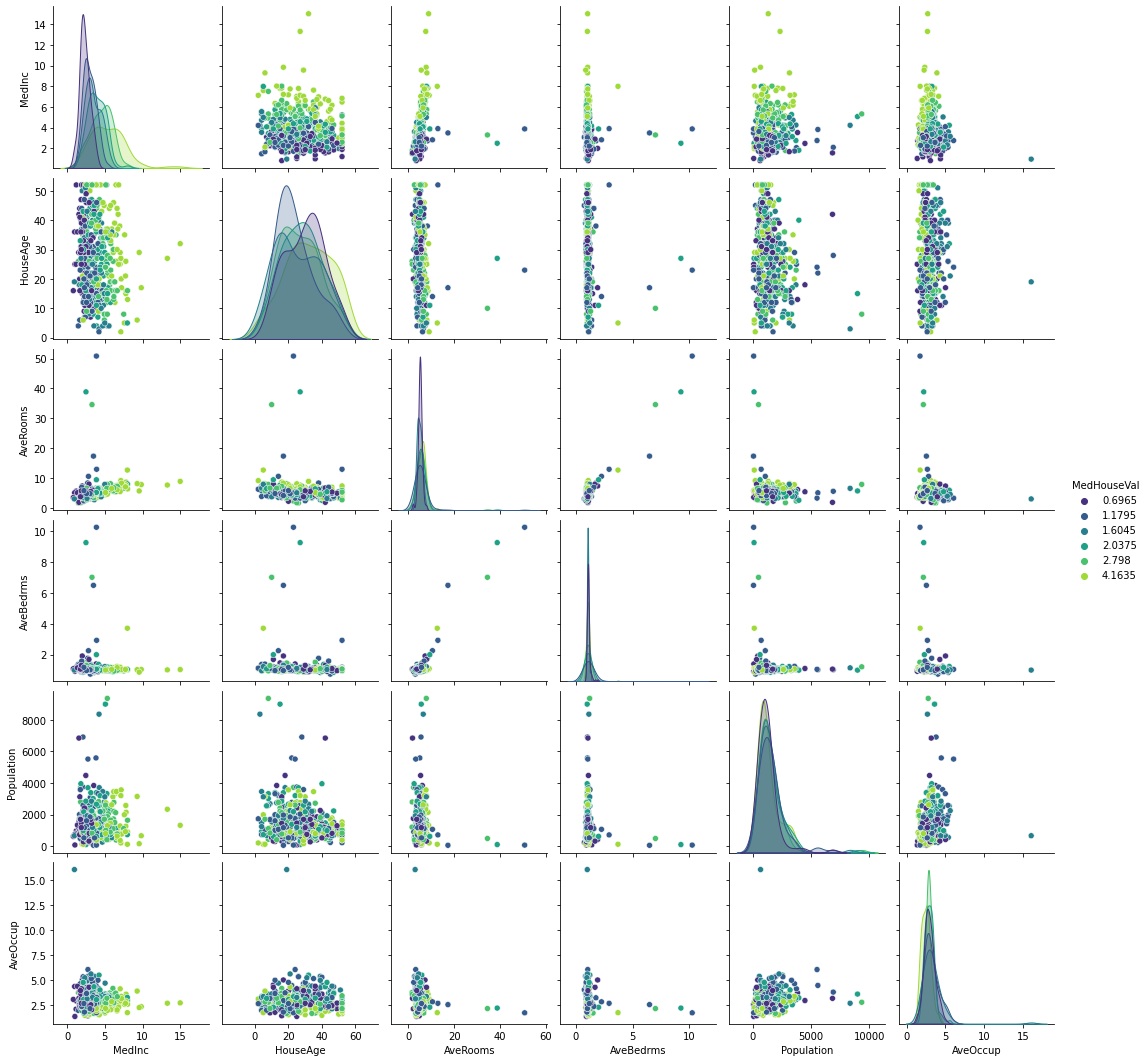

In [11]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

plt.figure(figsize=(16,9))
sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

We can confirm that some characteristics have extreme values (outliers?). We can also see that median income is useful in distinguishing high value homes from low value homes.

Thus, in creating a predictive model, we would expect longitude, latitude, and median income to be useful features to help predict median home values.

We will try several machine learning algorithms : linear regression (as a benchmark), Random Forest, and SVR.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate

In [13]:
linear = make_pipeline(StandardScaler(), LinearRegression(n_jobs=-1))
cv_results = cross_validate(linear, california_housing.data, california_housing.target, scoring=('r2', 'neg_mean_squared_error'))

print(f'Mean fit time: {np.mean(cv_results["fit_time"])}')
print(f'Mean R2 score: {np.mean(cv_results["test_r2"])}')
print(f'Mean squared error: {-np.mean(cv_results["test_neg_mean_squared_error"])}')

Mean fit time: 0.023200416564941408
Mean R2 score: 0.5530311140279566
Mean squared error: 0.558290171768655


In [14]:
forest = make_pipeline(StandardScaler(), RandomForestRegressor(n_jobs=-1))
cv_results = cross_validate(forest, california_housing.data, california_housing.target, scoring=('r2', 'neg_mean_squared_error'))

print(f'Mean fit time: {np.mean(cv_results["fit_time"])}')
print(f'Mean R2 score: {np.mean(cv_results["test_r2"])}')
print(f'Mean squared error: {-np.mean(cv_results["test_neg_mean_squared_error"])}')

Mean fit time: 5.1584821224212645
Mean R2 score: 0.6521140927271611
Mean squared error: 0.4302127345069767


In [ ]:
svr = make_pipeline(StandardScaler(), SVR())
cv_results = cross_validate(svr, california_housing.data, california_housing.target, scoring=('r2', 'neg_mean_squared_error'))

print(f'Mean fit time: {np.mean(cv_results["fit_time"])}')
print(f'Mean R2 score: {np.mean(cv_results["test_r2"])}')
print(f'Mean squared error: {-np.mean(cv_results["test_neg_mean_squared_error"])}')

In [ ]:
plot_learning_curve(linear, 'Linear model',  california_housing.data, california_housing.target, cv=cv, n_jobs=1)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from plot import plot_learning_curve
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(forest, 'Random Forest',  california_housing.data, california_housing.target, cv=cv, n_jobs=1)

In [ ]:
plot_learning_curve(svr, 'Learning Curves',  california_housing.data, california_housing.target, cv=cv, n_jobs=1)